## Örnek bir yorum veri setini inceleme

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category = UserWarning)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('HB_Yorumlar/hb_yorumlar1.csv', sep = ',')

In [4]:
data.head()

,tarih,derece,yorum
0,2022-05-09,5,"Güzel bir anlatımı var, henüz başındayım inşal..."
1,2022-04-28,5,Süreci özetlerken; bazı konuları ıskalamış old...
2,2022-05-05,5,Guzel tespıtler var. Yazarın yayınlarını ızley...
3,2022-05-01,5,Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,2022-05-05,5,Cildi çok güzel. Ön siparişten aldığım için bi...


In [5]:
df = data['yorum']

In [6]:
df.head()

0    Güzel bir anlatımı var, henüz başındayım inşal...
1    Süreci özetlerken; bazı konuları ıskalamış old...
2    Guzel tespıtler var. Yazarın yayınlarını ızley...
3    Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4    Cildi çok güzel. Ön siparişten aldığım için bi...
Name: yorum, dtype: object

In [7]:
df = pd.DataFrame(df)

In [8]:
df.head()

,yorum
0,"Güzel bir anlatımı var, henüz başındayım inşal..."
1,Süreci özetlerken; bazı konuları ıskalamış old...
2,Guzel tespıtler var. Yazarın yayınlarını ızley...
3,Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,Cildi çok güzel. Ön siparişten aldığım için bi...


In [9]:
df.yorum[1141]

'Bu çok hızlı elime geçti maile direk geldi diyenler nasıl geldi anlamıyorum tam 19 saat oldu gelen sadece reklam mailleri şaşırtıcı derecede hızlı evet anında parayı kestiler daha ortada cod mor yok ☺️☺️ hızınız için teşekkürler parayı çekme hızınız için'

In [10]:
df.yorum[1140]

'Siparişi verdik bir kaç dk içinde kod maile geldi roblox a yükledik yüklendi sonrası mı oğlusum 5 dk da bitirdi robuxlarını😍 satıcı güvenilir tavsiye olunur 👍'

### Büyük-küçük harf dönüsümü

In [11]:
dff = df.copy()
dff.head()

,yorum
0,"Güzel bir anlatımı var, henüz başındayım inşal..."
1,Süreci özetlerken; bazı konuları ıskalamış old...
2,Guzel tespıtler var. Yazarın yayınlarını ızley...
3,Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,Cildi çok güzel. Ön siparişten aldığım için bi...


In [12]:
dff = dff['yorum'].apply(lambda x: ' '.join(i.lower() for i in x.split()))

In [13]:
dff[1141]

'bu çok hızlı elime geçti maile direk geldi diyenler nasıl geldi anlamıyorum tam 19 saat oldu gelen sadece reklam mailleri şaşırtıcı derecede hızlı evet anında parayı kestiler daha ortada cod mor yok ☺️☺️ hızınız için teşekkürler parayı çekme hızınız için'

### Noktalama işaretlerinin ve sayıların silinmesi

In [14]:
type(dff)

pandas.core.series.Series

In [15]:
dff = dff.str.replace(r'[^\w\s]', '')

In [16]:
dff = dff.str.replace('\d', '')

In [17]:
dff[1141]

'bu çok hızlı elime geçti maile direk geldi diyenler nasıl geldi anlamıyorum tam  saat oldu gelen sadece reklam mailleri şaşırtıcı derecede hızlı evet anında parayı kestiler daha ortada cod mor yok  hızınız için teşekkürler parayı çekme hızınız için'

In [18]:
dff[1140]

'siparişi verdik bir kaç dk içinde kod maile geldi roblox a yükledik yüklendi sonrası mı oğlusum  dk da bitirdi robuxlarını satıcı güvenilir tavsiye olunur '

### Stopwords'ların (duraksama kelimeler) silinmesi

In [19]:
dff = pd.DataFrame(dff)

In [20]:
dff.head()

,yorum
0,güzel bir anlatımı var henüz başındayım inşall...
1,süreci özetlerken bazı konuları ıskalamış oldu...
2,guzel tespıtler var yazarın yayınlarını ızleye...
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,cildi çok güzel ön siparişten aldığım için bir...


In [21]:
from nltk.corpus import stopwords
sw = stopwords.words('turkish')

In [22]:
sw

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [23]:
dff = dff['yorum'].apply(lambda x: ' '.join(i for i in x.split() if i not in sw))

In [24]:
dff

0       güzel bir anlatımı var henüz başındayım inşall...
1       süreci özetlerken konuları ıskalamış olduğunu ...
2       guzel tespıtler var yazarın yayınlarını ızleye...
3       ürün hasarsız bir şekilde geldi hiçbir yerinde...
4       cildi güzel ön siparişten aldığım biraz bekled...
                              ...                        
3610        ürün gerçekten güzel tane pena kılıf hediyeli
3611    ürün tertemiz kusursuz sağlam bir şekilde elim...
3612    yamaha c klasik gitari siparis vermek konusund...
3613    urun guzel pro urunlerin baslangici ancak gond...
3614    memnun değilim bugün ürünü açtım hasarlı ürün ...
Name: yorum, Length: 3615, dtype: object

In [25]:
df.yorum

0       Güzel bir anlatımı var, henüz başındayım inşal...
1       Süreci özetlerken; bazı konuları ıskalamış old...
2       Guzel tespıtler var. Yazarın yayınlarını ızley...
3       Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4       Cildi çok güzel. Ön siparişten aldığım için bi...
                              ...                        
3610    Ürün gerçekten çok güzel, 2 tane pena ve kılıf...
3611    Ürün tertemiz, kusursuz ve sağlam bir şekilde ...
3612    Yamaha c40 klasik gitari siparis vermek konusu...
3613    Urun guzel pro urunlerin baslangici ancak gond...
3614    Hiç memnun değilim. Bugün ürünü açtım hasarlı ...
Name: yorum, Length: 3615, dtype: object

### Frekansı düsük olan kelimelerin silinmesi

In [26]:
type(dff)

pandas.core.series.Series

In [27]:
dff = pd.DataFrame(dff)

In [28]:
pd.Series(' '.join(dff['yorum']).split()).value_counts()

bir             2241
kitap            956
güzel            930
ederim           567
iyi              550
                ... 
jelatinliydi       1
pahalıydı          1
uygulamada         1
ederiiiim          1
gönderin           1
Length: 14814, dtype: int64

In [29]:
sil = pd.Series(' '.join(dff['yorum']).split()).value_counts()[-1000:] #sondan 100

In [30]:
sil

yatır             1
intenetten        1
temmasız          1
yüklediğinizde    1
virüs             1
                 ..
jelatinliydi      1
pahalıydı         1
uygulamada        1
ederiiiim         1
gönderin          1
Length: 1000, dtype: int64

In [31]:
dff = dff['yorum'].apply(lambda x: ' '.join(i for i in x.split() if i not in sil))

In [32]:
dff[0:20]

0     güzel bir anlatımı var henüz başındayım inşall...
1     süreci özetlerken konuları ıskalamış olduğunu ...
2     guzel tespıtler var yazarın yayınlarını ızleye...
3     ürün hasarsız bir şekilde geldi hiçbir yerinde...
4     cildi güzel ön siparişten aldığım biraz bekled...
5     kızım aldımposter ayraçları eksiksiz geldikarg...
6     kargolama süreci uzun sürsede beklemeye değerd...
7                                           ilgi çekici
8        kızım aldım beyza koç un kitaplarını beğeniyor
9                                hızlı kargo doğru ürün
10             günde hasarsız bir şekilde teslim edildi
11                            harika geldi kitap harika
12              güzel kargo başarılı satıcı teşekkürler
13    zamanki yalnızca kargo poşetine koyup gönderdi...
14    bir hayranı olarak polisiye tarzında olsa sevd...
15    muhteşem paketleme hızlıca geldi hemen okumaya...
16    henüz okumadım içerik yazarla alakalı değerlen...
17                   king yüzyılın edebiyat muci

In [33]:
df.yorum.head(20)

0     Güzel bir anlatımı var, henüz başındayım inşal...
1     Süreci özetlerken; bazı konuları ıskalamış old...
2     Guzel tespıtler var. Yazarın yayınlarını ızley...
3     Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4     Cildi çok güzel. Ön siparişten aldığım için bi...
5     Kızım için aldım.Poster ve ayraçları eksiksiz ...
6     Kargolama süreci uzun sürsede beklemeye değerd...
7                                       Çok ilgi çekici
8     Kızım için aldım, Beyza Koç un kitaplarını çok...
9                               Hızlı kargo doğru ürün.
10           1 günde hasarsız bir şekilde teslim edildi
11                           harika  geldi kitap harika
12              Güzel kargo başarılı satıcı teşekkürler
13    Her zamanki gibi yalnızca kargo poşetine koyup...
14    Bir hayranı olarak polisiye tarzında olsa da s...
15    Muhteşem paketleme ile hızlıca geldi. Hemen ok...
16    Henüz okumadım ama içerik yazarla alakalı değe...
17                King bu yüzyılın edebiyat muci

### Tokenization

In [34]:
import textblob
from textblob import TextBlob

In [35]:
dff = pd.DataFrame(dff)

In [36]:
dff['yorum'].apply(lambda x: TextBlob(x).words)

0       [güzel, bir, anlatımı, var, henüz, başındayım,...
1       [süreci, özetlerken, konuları, ıskalamış, oldu...
2       [guzel, tespıtler, var, yazarın, yayınlarını, ...
3       [ürün, hasarsız, bir, şekilde, geldi, hiçbir, ...
4       [cildi, güzel, ön, siparişten, aldığım, biraz,...
                              ...                        
3610    [ürün, gerçekten, güzel, tane, pena, kılıf, he...
3611    [ürün, tertemiz, kusursuz, sağlam, bir, şekild...
3612    [yamaha, c, klasik, gitari, siparis, vermek, k...
3613    [urun, guzel, pro, urunlerin, baslangici, anca...
3614    [memnun, değilim, bugün, ürünü, açtım, hasarlı...
Name: yorum, Length: 3615, dtype: object

### Stemming

In [37]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [38]:
dff['yorum'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

0       güzel bir anlatımı var henüz başındayım inşall...
1       süreci özetlerken konuları ıskalamış olduğunu ...
2       guzel tespıtler var yazarın yayınlarını ızleye...
3       ürün hasarsız bir şekild geldi hiçbir yerind h...
4       cildi güzel ön siparişten aldığım biraz bekled...
                              ...                        
3610           ürün gerçekten güzel tane pena kılıf hediy
3611    ürün tertemiz kusursuz sağlam bir şekild elim ...
3612    yamaha c klasik gitari sipari vermek konusunda...
3613    urun guzel pro urunlerin baslangici ancak gond...
3614    memnun değilim bugün ürünü açtım hasarlı ürün ...
Name: yorum, Length: 3615, dtype: object

In [39]:
df.yorum

0       Güzel bir anlatımı var, henüz başındayım inşal...
1       Süreci özetlerken; bazı konuları ıskalamış old...
2       Guzel tespıtler var. Yazarın yayınlarını ızley...
3       Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4       Cildi çok güzel. Ön siparişten aldığım için bi...
                              ...                        
3610    Ürün gerçekten çok güzel, 2 tane pena ve kılıf...
3611    Ürün tertemiz, kusursuz ve sağlam bir şekilde ...
3612    Yamaha c40 klasik gitari siparis vermek konusu...
3613    Urun guzel pro urunlerin baslangici ancak gond...
3614    Hiç memnun değilim. Bugün ürünü açtım hasarlı ...
Name: yorum, Length: 3615, dtype: object

In [40]:
df.yorum[1140]

'Siparişi verdik bir kaç dk içinde kod maile geldi roblox a yükledik yüklendi sonrası mı oğlusum 5 dk da bitirdi robuxlarını😍 satıcı güvenilir tavsiye olunur 👍'

In [41]:
dff.yorum[1140]

'siparişi verdik bir kaç dk içinde kod maile geldi roblox a yükledik yüklendi sonrası oğlusum dk bitirdi robuxlarını satıcı güvenilir tavsiye olunur'

### Lemmatization

In [42]:
from textblob import Word

In [43]:
type(dff)

pandas.core.frame.DataFrame

In [44]:
dff = pd.DataFrame(dff)

In [45]:
dff = dff['yorum'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [46]:
dff[0:30] # son hal

0     güzel bir anlatımı var henüz başındayım inşall...
1     süreci özetlerken konuları ıskalamış olduğunu ...
2     guzel tespıtler var yazarın yayınlarını ızleye...
3     ürün hasarsız bir şekilde geldi hiçbir yerinde...
4     cildi güzel ön siparişten aldığım biraz bekled...
5     kızım aldımposter ayraçları eksiksiz geldikarg...
6     kargolama süreci uzun sürsede beklemeye değerd...
7                                           ilgi çekici
8        kızım aldım beyza koç un kitaplarını beğeniyor
9                                hızlı kargo doğru ürün
10             günde hasarsız bir şekilde teslim edildi
11                            harika geldi kitap harika
12              güzel kargo başarılı satıcı teşekkürler
13    zamanki yalnızca kargo poşetine koyup gönderdi...
14    bir hayranı olarak polisiye tarzında olsa sevd...
15    muhteşem paketleme hızlıca geldi hemen okumaya...
16    henüz okumadım içerik yazarla alakalı değerlen...
17                   king yüzyılın edebiyat muci

In [47]:
df.yorum.head(30) # ilk hal

0     Güzel bir anlatımı var, henüz başındayım inşal...
1     Süreci özetlerken; bazı konuları ıskalamış old...
2     Guzel tespıtler var. Yazarın yayınlarını ızley...
3     Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4     Cildi çok güzel. Ön siparişten aldığım için bi...
5     Kızım için aldım.Poster ve ayraçları eksiksiz ...
6     Kargolama süreci uzun sürsede beklemeye değerd...
7                                       Çok ilgi çekici
8     Kızım için aldım, Beyza Koç un kitaplarını çok...
9                               Hızlı kargo doğru ürün.
10           1 günde hasarsız bir şekilde teslim edildi
11                           harika  geldi kitap harika
12              Güzel kargo başarılı satıcı teşekkürler
13    Her zamanki gibi yalnızca kargo poşetine koyup...
14    Bir hayranı olarak polisiye tarzında olsa da s...
15    Muhteşem paketleme ile hızlıca geldi. Hemen ok...
16    Henüz okumadım ama içerik yazarla alakalı değe...
17                King bu yüzyılın edebiyat muci

In [48]:
dff[122]

'peygamberimizi anlatacak söz kelimeler yetmez kitapta unutmuş olduklarımız hatırlatılıyor bir bölümde allahtan başka tanrı yoktur yerine ilah yazılsaydı bana göre iyi olurdu'

In [49]:
df.yorum[122]

'Peygamberimizi  anlatacak söz ve kelimeler  yetmez, bu kitapta unutmuş olduklarımız  hatırlatılıyor. Bir  bölümde Allahtan  başka tanrı yoktur  yerine, İlah yazılsaydı  bana göre daha iyi olurdu.'

### Matematiksel işlemler ve Basit özellik çıkarımı

In [50]:
type(dff)

pandas.core.series.Series

In [51]:
dff = pd.DataFrame(dff)

In [52]:
dff.head()

,yorum
0,güzel bir anlatımı var henüz başındayım inşall...
1,süreci özetlerken konuları ıskalamış olduğunu ...
2,guzel tespıtler var yazarın yayınlarını ızleye...
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,cildi güzel ön siparişten aldığım biraz bekled...


In [53]:
dff2 = dff.copy()

In [54]:
dff2['yorum'].str.len() # harf sayısı

0        76
1       262
2       192
3        58
4       148
       ... 
3610     45
3611    148
3612    214
3613    129
3614    150
Name: yorum, Length: 3615, dtype: int64

In [55]:
dff2['harfSayisi'] = dff2['yorum'].str.len()

In [56]:
dff2.head()

,yorum,harfSayisi
0,güzel bir anlatımı var henüz başındayım inşall...,76
1,süreci özetlerken konuları ıskalamış olduğunu ...,262
2,guzel tespıtler var yazarın yayınlarını ızleye...,192
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...,58
4,cildi güzel ön siparişten aldığım biraz bekled...,148


In [57]:
dff2['yorum'].apply(lambda x: len(str(x).split())) # kelime sayısı

0       11
1       29
2       22
3       10
4       20
        ..
3610     7
3611    19
3612    29
3613    21
3614    20
Name: yorum, Length: 3615, dtype: int64

In [58]:
dff2['kelimeSayisi'] = dff2['yorum'].apply(lambda x: len(str(x).split()))

In [59]:
dff2.head()

,yorum,harfSayisi,kelimeSayisi
0,güzel bir anlatımı var henüz başındayım inşall...,76,11
1,süreci özetlerken konuları ıskalamış olduğunu ...,262,29
2,guzel tespıtler var yazarın yayınlarını ızleye...,192,22
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...,58,10
4,cildi güzel ön siparişten aldığım biraz bekled...,148,20


In [60]:
dff2.yorum[0]

'güzel bir anlatımı var henüz başındayım inşallah sonunda aynı fikirde olurum'

In [61]:
# özel karakteri yakalamak ve saydırmak

In [62]:
pd.Series(' '.join(dff2['yorum']).split()).value_counts()

bir           2241
kitap          956
güzel          930
ederim         567
iyi            550
              ... 
önümüzdeki       1
yıldızlara       1
merakım          1
çarkı            1
arkası           1
Length: 13804, dtype: int64

In [63]:
# bir kelimesi icin,
dff2['yorum'].apply(lambda x: len([i for i in x.split()
                                 if i.startswith('bir')]))

0       1
1       1
2       0
3       1
4       1
       ..
3610    0
3611    1
3612    1
3613    0
3614    0
Name: yorum, Length: 3615, dtype: int64

In [64]:
dff2['bir_kelimeSayisi'] = dff2['yorum'].apply(lambda x: len([i for i in x.split()
                                 if i.startswith('bir')]))

In [65]:
dff2.head()

,yorum,harfSayisi,kelimeSayisi,bir_kelimeSayisi
0,güzel bir anlatımı var henüz başındayım inşall...,76,11,1
1,süreci özetlerken konuları ıskalamış olduğunu ...,262,29,1
2,guzel tespıtler var yazarın yayınlarını ızleye...,192,22,0
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...,58,10,1
4,cildi güzel ön siparişten aldığım biraz bekled...,148,20,1


In [66]:
dff.head()

,yorum
0,güzel bir anlatımı var henüz başındayım inşall...
1,süreci özetlerken konuları ıskalamış olduğunu ...
2,guzel tespıtler var yazarın yayınlarını ızleye...
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,cildi güzel ön siparişten aldığım biraz bekled...


### WordCloud

In [67]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [68]:
text = ' '.join(i for i in dff.yorum)

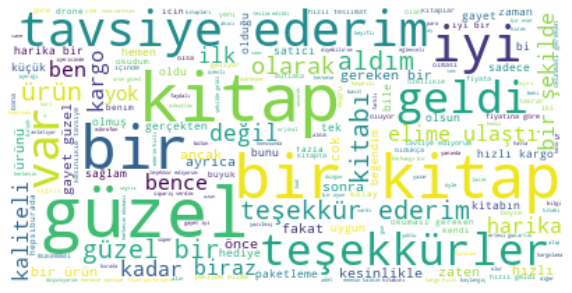

In [69]:
wc = WordCloud(max_font_size = 50,
              background_color = 'white').generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [70]:
mask = np.array(Image.open('hb.png'))
mask

array([[[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]],

       [[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]],

       [[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]],

       ...,

       [[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]],

       [[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]],

       [[246, 146,  32],
        [246, 146,  32],
        [246, 146,  32],
        ...,
        [246, 146,  32],
        [246, 146,  32],
        [246, 146,  32]]

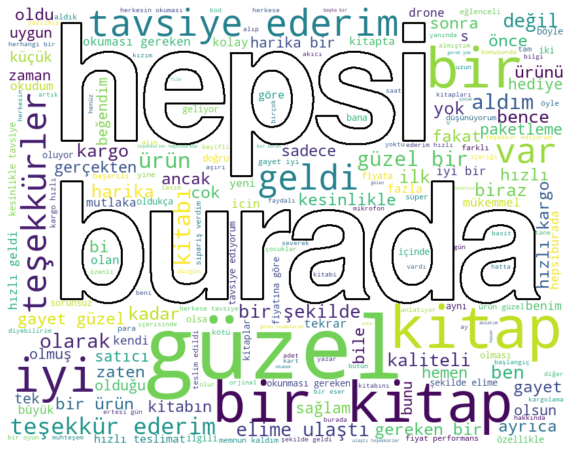

In [71]:
wc = WordCloud(background_color = 'white',
              mask = mask,
              contour_width = 3)

wc.generate(text)
wc.to_file('hb_wordCloud.png')

plt.figure(figsize = [10, 10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Sentiment Analizi ve Sınıflandırma Modelleri

In [72]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from pandas import MultiIndex, Int64Index

import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [73]:
dff.head()

,yorum
0,güzel bir anlatımı var henüz başındayım inşall...
1,süreci özetlerken konuları ıskalamış olduğunu ...
2,guzel tespıtler var yazarın yayınlarını ızleye...
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,cildi güzel ön siparişten aldığım biraz bekled...


In [74]:
data.head()

,tarih,derece,yorum
0,2022-05-09,5,"Güzel bir anlatımı var, henüz başındayım inşal..."
1,2022-04-28,5,Süreci özetlerken; bazı konuları ıskalamış old...
2,2022-05-05,5,Guzel tespıtler var. Yazarın yayınlarını ızley...
3,2022-05-01,5,Ürün hasarsız bir şekilde geldi hiçbir yerinde...
4,2022-05-05,5,Cildi çok güzel. Ön siparişten aldığım için bi...


In [75]:
data.shape, dff.shape

((3615, 3), (3615, 1))

In [76]:
dataSet = pd.DataFrame({'yorum':dff['yorum'], 'puan':data['derece']})

In [77]:
dataSet.head()

,yorum,puan
0,güzel bir anlatımı var henüz başındayım inşall...,5
1,süreci özetlerken konuları ıskalamış olduğunu ...,5
2,guzel tespıtler var yazarın yayınlarını ızleye...,5
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...,5
4,cildi güzel ön siparişten aldığım biraz bekled...,5


In [78]:
dataSet.puan.value_counts()

5    3156
4     278
3      81
1      76
2      24
Name: puan, dtype: int64

In [79]:
dataSet.loc[dataSet['puan'] < 4, 'puan'] = 1
dataSet.loc[dataSet['puan'] == 4, 'puan'] = 5

In [80]:
dataSet.puan.value_counts()

5    3434
1     181
Name: puan, dtype: int64

In [81]:
dataSet['puan'].replace(5, value = 'pozitif', inplace = True)
dataSet['puan'].replace(1, value = 'negatif', inplace = True)

In [82]:
dataSet.puan.value_counts()

pozitif    3434
negatif     181
Name: puan, dtype: int64

In [83]:
df = pd.DataFrame({'text':dataSet['yorum'], 'label':dataSet['puan']})

In [84]:
df.head()

,text,label
0,güzel bir anlatımı var henüz başındayım inşall...,pozitif
1,süreci özetlerken konuları ıskalamış olduğunu ...,pozitif
2,guzel tespıtler var yazarın yayınlarını ızleye...,pozitif
3,ürün hasarsız bir şekilde geldi hiçbir yerinde...,pozitif
4,cildi güzel ön siparişten aldığım biraz bekled...,pozitif


### Değişken mühendisligi

In [85]:
from sklearn.utils import shuffle

In [86]:
df = shuffle(df)
df.head()

,text,label
679,lerin başında normal monopoly alınmıştı eve an...,pozitif
2329,kızım kullanıyor oldukça güzel bir kitap,pozitif
3350,kesinlikle insanın bir kere okuması gereken bi...,pozitif
2097,güzel bir kitap özellikle çocuk sahibi olan he...,pozitif
2173,iyi kitap işimize yarıyor,pozitif


In [87]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(df['text'],
                                                               df['label'],
                                                               random_state = 1) 

In [88]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.fit_transform(ytest)

In [89]:
# count vectors
vc = CountVectorizer().fit(Xtrain)
vc

CountVectorizer()

In [90]:
Xtrain_count = vc.transform(Xtrain)
Xtest_count = vc.transform(Xtest)

In [91]:
vc.get_feature_names()[0:20]

['abalajlanmış',
 'abartmış',
 'abarttın',
 'abartılacak',
 'abartılan',
 'abartıldığını',
 'abartısız',
 'abdest',
 'abdestini',
 'abdülhamit',
 'abiquot',
 'ablama',
 'abonelik',
 'acayip',
 'acele',
 'aceleye',
 'acemi',
 'acemiliğini',
 'acemiyim',
 'acikcasi']

In [92]:
Xtrain_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [93]:
# word level
tfidf_word_vc = TfidfVectorizer(analyzer = 'word').fit(Xtrain)
Xtrain_tfidf_word = tfidf_word_vc.transform(Xtrain)
Xtest_tfidf_word = tfidf_word_vc.transform(Xtest)

In [94]:
# n-gram level
tfidf_ngram_vc = TfidfVectorizer(ngram_range = (2, 3)).fit(Xtrain)
Xtrain_tfidf_ngram = tfidf_ngram_vc.transform(Xtrain)
Xtest_tfidf_ngram = tfidf_ngram_vc.transform(Xtest)

In [95]:
# char level
tfidf_char_vc = TfidfVectorizer(analyzer = 'char').fit(Xtrain)
Xtrain_tfidf_char = tfidf_char_vc.transform(Xtrain)
Xtest_tfidf_char = tfidf_char_vc.transform(Xtest)

### Makine Öğrenmesi ve Sentiment Analizi

* Logistic Regresyon

In [96]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_count, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_count,
                                          ytest,
                                          cv = 10).mean()

print(f'Count Vectors dogruluk skoru: {accuracy}')

Count Vectors dogruluk skoru: 0.9557753357753358


In [97]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_word, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_word,
                                          ytest,
                                          cv = 10).mean()

print(f'Word-level TF-IDF dogruluk skoru: {accuracy}')

Word-level TF-IDF dogruluk skoru: 0.9524542124542125


In [98]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_ngram, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_ngram,
                                          ytest,
                                          cv = 10).mean()

print(f'N-gram TF-IDF dogruluk skoru: {accuracy}')

N-gram TF-IDF dogruluk skoru: 0.9524542124542125


In [99]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_char, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_char,
                                          ytest,
                                          cv = 10).mean()
print(f'Char-level TF-IDF dogruluk skoru: {accuracy}')

Char-level TF-IDF dogruluk skoru: 0.9524542124542125


* Niave Bayes

In [100]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(Xtrain_count, ytrain)
accuracy = model_selection.cross_val_score(nb_model,
                                          Xtest_count,
                                          ytest,
                                          cv = 10).mean()

print(f'Count Vectors Doğruluk Oranı: {accuracy}')

Count Vectors Doğruluk Oranı: 0.9546764346764347


In [101]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(Xtrain_tfidf_word, ytrain)
accuracy = model_selection.cross_val_score(nb_model,
                                          Xtest_tfidf_word,
                                          ytest,
                                          cv = 10).mean()

print(f'Word-level TF-IDF dogruluk skoru: {accuracy}')

Word-level TF-IDF dogruluk skoru: 0.9524542124542125


In [102]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(Xtrain_tfidf_ngram, ytrain)
accuracy = model_selection.cross_val_score(nb_model,
                                          Xtest_tfidf_ngram,
                                          ytest,
                                          cv = 10).mean()

print(f'N-gram TF-IDF dogruluk skoru: {accuracy}')

N-gram TF-IDF dogruluk skoru: 0.9524542124542125


In [103]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(Xtrain_tfidf_char, ytrain)
accuracy = model_selection.cross_val_score(nb_model,
                                          Xtest_tfidf_char,
                                          ytest,
                                          cv = 10).mean()

print(f'Char-level TF-IDF dogruluk skoru: {accuracy}')

Char-level TF-IDF dogruluk skoru: 0.9524542124542125


* Random Forests

In [104]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(Xtrain_count, ytrain)
accuracy = model_selection.cross_val_score(rf_model,
                                          Xtest_count,
                                          ytest,
                                          cv = 10).mean()

print(f'Count Vectors Doğruluk Oranı: {accuracy}')

Count Vectors Doğruluk Oranı: 0.9568864468864469


In [105]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(Xtrain_tfidf_word, ytrain)
accuracy = model_selection.cross_val_score(rf_model,
                                          Xtest_tfidf_word,
                                          ytest,
                                          cv = 10).mean()

print(f'Word-level TF-IDF dogruluk skoru: {accuracy}')

Word-level TF-IDF dogruluk skoru: 0.9568864468864469


In [106]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(Xtrain_tfidf_ngram, ytrain)
accuracy = model_selection.cross_val_score(rf_model,
                                          Xtest_tfidf_ngram,
                                          ytest,
                                          cv = 10).mean()

print(f'Ngram-level TF-IDF dogruluk skoru: {accuracy}')

Ngram-level TF-IDF dogruluk skoru: 0.9557753357753358


In [107]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(Xtrain_tfidf_char, ytrain)
accuracy = model_selection.cross_val_score(rf_model,
                                          Xtest_tfidf_char,
                                          ytest,
                                          cv = 10).mean()

print(f'Char-level TF-IDF dogruluk skoru: {accuracy}')

Char-level TF-IDF dogruluk skoru: 0.9568864468864469


* XGBoost

In [108]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(Xtrain_count, ytrain)
accuracy = model_selection.cross_val_score(xgb_model,
                                          Xtest_count,
                                          ytest,
                                          cv = 10).mean()

print(f'Count Vectors Doğruluk Oranı: {accuracy}')

[21:52:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [109]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(Xtrain_tfidf_word, ytrain)
accuracy = model_selection.cross_val_score(xgb_model,
                                          Xtest_tfidf_word,
                                          ytest,
                                          cv = 10).mean()

print(f'Word-level TF-IDF dogruluk skoru: {accuracy}')

[21:52:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [110]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(Xtrain_tfidf_ngram, ytrain)
accuracy = model_selection.cross_val_score(xgb_model,
                                          Xtest_tfidf_ngram,
                                          ytest,
                                          cv = 10).mean()

print(f'Ngram-level TF-IDF dogruluk skoru: {accuracy}')

[21:53:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [111]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(Xtrain_tfidf_char, ytrain)
accuracy = model_selection.cross_val_score(rf_model,
                                          Xtest_tfidf_char,
                                          ytest,
                                          cv = 10).mean()

print(f'Char-level TF-IDF dogruluk skoru: {accuracy}')

[21:53:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Char-level TF-IDF dogruluk skoru: 0.9568864468864469
